<a href="https://colab.research.google.com/github/putrasandya/Inventory-Classification-and-Safety-Stock/blob/main/Inventory_Classification_and_Safety_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd
!pip install inventorize3
import inventorize3 as inv
import datetime
retail = pd.read_csv('/content/online_retail_II.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
#Cleaning Data

retail=retail.drop_duplicates()
retail.isna().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

In [84]:
#Drop Null Rows
retail=retail.dropna(axis=0)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [85]:
#Modify datatype
retail.InvoiceDate.head()

0    2009-12-01 07:45:00
1    2009-12-01 07:45:00
2    2009-12-01 07:45:00
3    2009-12-01 07:45:00
4    2009-12-01 07:45:00
Name: InvoiceDate, dtype: object

In [86]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])
retail['Date']=retail.InvoiceDate.dt.strftime("%Y-%m-%d")
retail['Date'].head()
retail['Date']=pd.to_datetime(retail['Date'])

In [87]:
#Extract Data 3 month
max(retail.Date)
last_three=retail[retail.Date > "2010-04-01"]
last_three.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date
149402,503597,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1152,2010-04-06 09:28:00,0.18,16754.0,United Kingdom,2010-04-06
149403,503598,21915,RED HARMONICA IN BOX,280,2010-04-06 09:30:00,1.06,16754.0,United Kingdom,2010-04-06
149404,503599,16156S,WRAP PINK FAIRY CAKES,150,2010-04-06 09:37:00,0.42,17949.0,United Kingdom,2010-04-06
149405,503600,22197,"POPCORN HOLDER , SMALL",300,2010-04-06 09:39:00,0.72,17949.0,United Kingdom,2010-04-06
149406,C503601,22561,WOODEN SCHOOL COLOURING SET,-12,2010-04-06 09:43:00,1.65,13803.0,United Kingdom,2010-04-06


In [88]:
#Modify Data Frame
#Add Revenue Column
last_three['revenue']=last_three['Quantity']*last_three['Price']
last_three.head()

<ipython-input-88-4047ccf13ac3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_three['revenue']=last_three['Quantity']*last_three['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Date,revenue
149402,503597,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1152,2010-04-06 09:28:00,0.18,16754.0,United Kingdom,2010-04-06,207.36
149403,503598,21915,RED HARMONICA IN BOX,280,2010-04-06 09:30:00,1.06,16754.0,United Kingdom,2010-04-06,296.80
149404,503599,16156S,WRAP PINK FAIRY CAKES,150,2010-04-06 09:37:00,0.42,17949.0,United Kingdom,2010-04-06,63.00
149405,503600,22197,"POPCORN HOLDER , SMALL",300,2010-04-06 09:39:00,0.72,17949.0,United Kingdom,2010-04-06,216.00
149406,C503601,22561,WOODEN SCHOOL COLOURING SET,-12,2010-04-06 09:43:00,1.65,13803.0,United Kingdom,2010-04-06,-19.80


In [89]:
#Total Sales per Item
Sales = last_three.groupby(['Date','Description']).agg(total_daily = ('Quantity',np.sum),
                                                   total_revenue = ('revenue',np.sum)).reset_index()
Sales.head()

,Date,Description,total_daily,total_revenue
0,2010-04-06,PEACE WOODEN BLOCK LETTERS,3,20.85
1,2010-04-06,12 PENCILS SMALL TUBE SKULL,2,1.30
2,2010-04-06,12 PENCILS TALL TUBE WOODLAND,12,10.20
3,2010-04-06,15 PINK FLUFFY CHICKS IN BOX,1,2.95
4,2010-04-06,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,7.95


In [90]:
#Mean of Sales
## calc. mean and sd of total_daily

AvgSales = Sales.groupby("Description").agg(average= ('total_daily',np.mean),
                                       sd = ('total_daily','std'),
                                       total_sales=('total_daily',np.sum),
                                       total_revenue=('total_revenue',np.sum)).reset_index()
AvgSales.head()                                       

,Description,average,sd,total_sales,total_revenue
0,3 STRIPEY MICE FELTCRAFT,6.000000,0.000000,24,46.80
1,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,324,495.16
2,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75
3,DOLLY GIRL BEAKER,28.416667,70.998932,2387,2745.75
4,FLAMINGO LIGHTS,4.000000,NaN,4,19.80


In [91]:
#Classification Product (ABC Analysis)
#First Alphabet : A(fast moving), B(Normal), C(Slow Moving)
#Second Alphabet : A(high revenue), B(Normal), C(low revenue)
for_abc = inv.productmix(AvgSales['Description'],AvgSales['total_sales'],AvgSales['total_revenue'])
for_abc


,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix
3447,REGENCY CAKESTAND 3 TIER,21952,252484.60,0.002607,0.147376,0.018099,0.018099,A,A,A_A
4626,WHITE HANGING HEART T-LIGHT HOLDER,68879,186526.98,0.008180,0.027836,0.013371,0.031470,A,A,A_A
2181,JUMBO BAG RED RETROSPOT,73033,132180.02,0.008673,0.019657,0.009475,0.040945,A,A,A_A
258,ASSORTED COLOUR BIRD ORNAMENT,66923,106445.15,0.007947,0.035783,0.007630,0.048575,A,A,A_A
3238,POSTAGE,4465,99220.06,0.000530,0.602952,0.007112,0.055687,A,A,A_A
...,...,...,...,...,...,...,...,...,...,...
3014,PINK CHERRY LIGHTS,-370,-2194.20,-0.000044,1.000416,-0.000157,1.012884,C,C,C_C
4608,WHITE CHERRY LIGHTS,-709,-4225.55,-0.000084,1.000287,-0.000303,1.012581,C,C,C_C
1083,CRUK Commission,-16,-7933.43,-0.000002,1.000589,-0.000569,1.012012,C,C,C_C
1324,Discount,-2419,-10857.18,-0.000287,1.000000,-0.000778,1.011234,C,C,C_C


In [92]:
#Visual Sales per Product
from matplotlib import pyplot as plt
visual = for_abc.product_mix.value_counts()
visual


C_C    2352
A_A     685
B_B     500
B_C     364
C_B     284
A_B     274
B_A     234
A_C      88
C_A      63
Name: product_mix, dtype: int64

<BarContainer object of 9 artists>

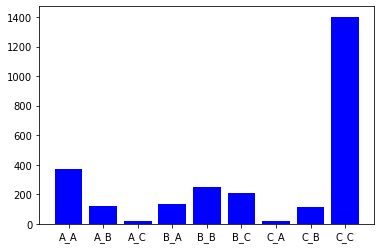

In [93]:
visual1 = {'Product':['A_A','A_B','A_C','B_A','B_B','B_C','C_A','C_B','C_C'],
          'Total' : [370,122,21,135,249,211,20,113,1401]}
visual1=pd.DataFrame(visual1)
visual1
plt.bar(visual1.Product,visual1.Total, color='Blue')

In [94]:
#Visual Sales per Revenue
from matplotlib import pyplot as plt
visual = for_abc.groupby('product_mix')['revenue'].sum()
visual


product_mix
A_A    9335563.670
A_B     606399.090
A_C     -92484.260
B_A    1480690.850
B_B     978754.280
B_C     237194.910
C_A     342153.740
C_B     509099.030
C_C     552971.579
Name: revenue, dtype: float64

<BarContainer object of 9 artists>

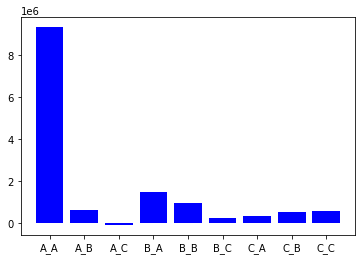

In [95]:
visual2 = {'Product':['A_A','A_B','A_C','B_A','B_B','B_C','C_A','C_B','C_C'],
          'Revenue' : [9335563.670,606399.090,-92484.260,1480690.850,978754.280,237194.910,342153.740,509099.030,552971.579]}
visual2=pd.DataFrame(visual2)
visual2
plt.bar(visual2.Product,visual2.Revenue, color='Blue')

<Axes: xlabel='Sales', ylabel='Revenue'>

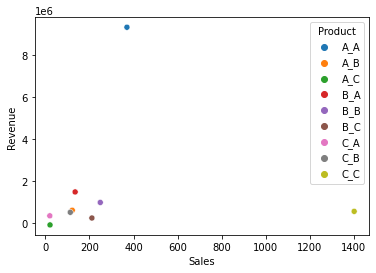

In [110]:
import seaborn as sns
visual3 ={ 'Product' : visual1.Product,
          'Sales' : visual1.Total,
          'Revenue' : visual2.Revenue}
visual3=pd.DataFrame(visual3)
visual3
sns.scatterplot(x='Sales', y='Revenue', hue='Product', data= visual3)

In [96]:
#Menentukan Service Level
lead_time =12
sd_leadtime =2
mapping ={"A_A":0.95, "A_B":0.95, "A_C":0.95,
          "C_A":0.8, "C_B":0.8, "C_C":0.7,
           "B_A":0.7, "B_B":0.7, "B_C":0.75}
for_abc['service_level']= for_abc.product_mix.map(mapping)
for_abc.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
3447,REGENCY CAKESTAND 3 TIER,21952,252484.60,0.002607,0.147376,0.018099,0.018099,A,A,A_A,0.95
4626,WHITE HANGING HEART T-LIGHT HOLDER,68879,186526.98,0.008180,0.027836,0.013371,0.031470,A,A,A_A,0.95
2181,JUMBO BAG RED RETROSPOT,73033,132180.02,0.008673,0.019657,0.009475,0.040945,A,A,A_A,0.95
258,ASSORTED COLOUR BIRD ORNAMENT,66923,106445.15,0.007947,0.035783,0.007630,0.048575,A,A,A_A,0.95
3238,POSTAGE,4465,99220.06,0.000530,0.602952,0.007112,0.055687,A,A,A_A,0.95


In [97]:
abcd = for_abc[['skus','service_level']]
for_reorder=pd.merge(AvgSales, abcd, how='left', left_on='Description', right_on='skus')
for_reorder.head()

,Description,average,sd,total_sales,total_revenue,skus,service_level
0,3 STRIPEY MICE FELTCRAFT,6.000000,0.000000,24,46.80,3 STRIPEY MICE FELTCRAFT,0.70
1,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,324,495.16,4 PURPLE FLOCK DINNER CANDLES,0.70
2,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75,50'S CHRISTMAS GIFT BAG LARGE,0.70
3,DOLLY GIRL BEAKER,28.416667,70.998932,2387,2745.75,DOLLY GIRL BEAKER,0.95
4,FLAMINGO LIGHTS,4.000000,NaN,4,19.80,FLAMINGO LIGHTS,0.70


In [99]:
df_ltv = pd.DataFrame()
for_reorder.columns

for i in range(for_reorder.shape[0]):
    ordering_point = inv.reorderpoint_leadtime_variability(int(for_reorder.loc[i,'average']),
                                      for_reorder.loc[i,'sd'], 12,2,  # lead_time is 12 & variablity is 2
                                      for_reorder.loc[i,'service_level'])
    as_data = pd.DataFrame(ordering_point,index=[0])
    as_data['Descrition']= for_reorder.loc[i,'Description']
    df_ltv = pd.concat([df_ltv, as_data], axis=0)
df_ltv

,demandleadtime,sigmadl,safteyfactor,reorder_point,Descrition
0,72,8.602325,0.524401,76.511064,3 STRIPEY MICE FELTCRAFT
0,84,38.842012,0.524401,104.368771,4 PURPLE FLOCK DINNER CANDLES
0,372,197.212189,0.524401,475.418173,50'S CHRISTMAS GIFT BAG LARGE
0,336,249.118808,1.644854,745.763976,DOLLY GIRL BEAKER
0,48,NaN,0.524401,NaN,FLAMINGO LIGHTS
...,...,...,...,...,...
0,420,167.977413,1.644854,696.298257,ZINC T-LIGHT HOLDER STARS SMALL
0,12,4.945861,0.524401,14.593612,ZINC TOP 2 DOOR WOODEN SHELF
0,240,84.808214,1.644854,379.497098,ZINC WILLIE WINKIE CANDLE STICK
0,24,9.237604,0.524401,28.844204,ZINC WIRE KITCHEN ORGANISER


In [100]:
all_data= pd.merge(for_reorder, df_ltv, how='left', left_on='Description', right_on='Descrition')
all_data.head()

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,Descrition
0,3 STRIPEY MICE FELTCRAFT,6.000000,0.000000,24,46.80,3 STRIPEY MICE FELTCRAFT,0.70,72,8.602325,0.524401,76.511064,3 STRIPEY MICE FELTCRAFT
1,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,324,495.16,4 PURPLE FLOCK DINNER CANDLES,0.70,84,38.842012,0.524401,104.368771,4 PURPLE FLOCK DINNER CANDLES
2,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75,50'S CHRISTMAS GIFT BAG LARGE,0.70,372,197.212189,0.524401,475.418173,50'S CHRISTMAS GIFT BAG LARGE
3,DOLLY GIRL BEAKER,28.416667,70.998932,2387,2745.75,DOLLY GIRL BEAKER,0.95,336,249.118808,1.644854,745.763976,DOLLY GIRL BEAKER
4,FLAMINGO LIGHTS,4.000000,NaN,4,19.80,FLAMINGO LIGHTS,0.70,48,NaN,0.524401,NaN,FLAMINGO LIGHTS


In [102]:
all_data['safety_stock']= all_data['reorder_point'] - all_data['demandleadtime']
all_data

,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,Descrition,safety_stock
0,3 STRIPEY MICE FELTCRAFT,6.000000,0.000000,24,46.80,3 STRIPEY MICE FELTCRAFT,0.70,72,8.602325,0.524401,76.511064,3 STRIPEY MICE FELTCRAFT,4.511064
1,4 PURPLE FLOCK DINNER CANDLES,7.363636,10.850123,324,495.16,4 PURPLE FLOCK DINNER CANDLES,0.70,84,38.842012,0.524401,104.368771,4 PURPLE FLOCK DINNER CANDLES,20.368771
2,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75,50'S CHRISTMAS GIFT BAG LARGE,0.70,372,197.212189,0.524401,475.418173,50'S CHRISTMAS GIFT BAG LARGE,103.418173
3,DOLLY GIRL BEAKER,28.416667,70.998932,2387,2745.75,DOLLY GIRL BEAKER,0.95,336,249.118808,1.644854,745.763976,DOLLY GIRL BEAKER,409.763976
4,FLAMINGO LIGHTS,4.000000,NaN,4,19.80,FLAMINGO LIGHTS,0.70,48,NaN,0.524401,NaN,FLAMINGO LIGHTS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,ZINC T-LIGHT HOLDER STARS SMALL,35.925926,46.339698,4850,3843.46,ZINC T-LIGHT HOLDER STARS SMALL,0.95,420,167.977413,1.644854,696.298257,ZINC T-LIGHT HOLDER STARS SMALL,276.298257
4840,ZINC TOP 2 DOOR WOODEN SHELF,1.038462,1.427747,27,449.65,ZINC TOP 2 DOOR WOODEN SHELF,0.70,12,4.945861,0.524401,14.593612,ZINC TOP 2 DOOR WOODEN SHELF,2.593612
4841,ZINC WILLIE WINKIE CANDLE STICK,20.202429,23.076744,4990,4152.58,ZINC WILLIE WINKIE CANDLE STICK,0.95,240,84.808214,1.644854,379.497098,ZINC WILLIE WINKIE CANDLE STICK,139.497098
4842,ZINC WIRE KITCHEN ORGANISER,2.500000,2.505549,25,156.80,ZINC WIRE KITCHEN ORGANISER,0.70,24,9.237604,0.524401,28.844204,ZINC WIRE KITCHEN ORGANISER,4.844204


In [103]:
all_data[all_data.safety_stock == max(all_data.safety_stock)]


,Description,average,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,Descrition,safety_stock
458,BLACK SILVER FLOWER T-LIGHT HOLDER,531.818182,2554.053164,5850,588.78,BLACK SILVER FLOWER T-LIGHT HOLDER,0.95,6372,8879.31139,1.644854,20977.167545,BLACK SILVER FLOWER T-LIGHT HOLDER,14605.167545


<Axes: xlabel='sd', ylabel='safety_stock'>

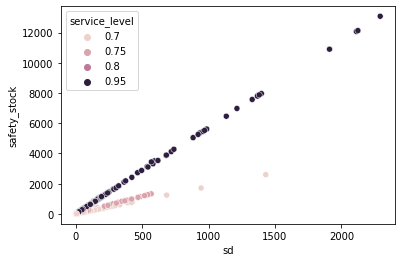

In [104]:
all_data=all_data[all_data.safety_stock != max(all_data.safety_stock)]
import seaborn as sns

sns.scatterplot(x='sd', y='safety_stock', hue='service_level', data= all_data)

<Axes: xlabel='demandleadtime', ylabel='safety_stock'>

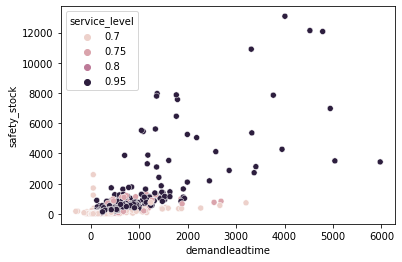

In [105]:
sns.scatterplot(x='demandleadtime', y='safety_stock', hue='service_level', data= all_data)